In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt



# generate training and test sets

In [167]:
def Generate_data(n):
    X = np.random.uniform(0,1,n).reshape(-1,1)
    Noise = np.random.normal(0,0.3, n).reshape(-1,1) 
    t = np.sin(2*np.pi*X) + Noise
    return X, t

n_train = 10
n_test = 100
X_train, t_train = Generate_data(n_train)
X_test, t_test = Generate_data(n_test)

In [168]:
X_train.shape

(10, 1)

In [169]:
print(X_train)

[[0.32508308]
 [0.30011892]
 [0.00973168]
 [0.58683647]
 [0.6045721 ]
 [0.57878754]
 [0.95101501]
 [0.61180912]
 [0.60068022]
 [0.69019274]]


In [170]:
np.multiply(X_train,X_train)

array([[1.05679007e-01],
       [9.00713690e-02],
       [9.47056172e-05],
       [3.44377048e-01],
       [3.65507421e-01],
       [3.34995015e-01],
       [9.04429550e-01],
       [3.74310394e-01],
       [3.60816722e-01],
       [4.76366018e-01]])

In [171]:
M = 9
Phi = np.zeros([X_train.shape[0],M+1])  # Creating a [n,M+1] matrix
Phi.shape

(10, 10)

In [172]:
for i in range(M+1):
    Phi[:,i] = (X_train**(i)).reshape(-1,)      # reshape(-1,) converts a matrix to a vector

In [173]:
def Polynomial(M, X):
    # M is the polynomial degree
    # M is the data (could be either training or testing set)
    Phi = np.zeros([X.shape[0],M+1])  # Creating a [n,M+1] matrix
    for i in range(M+1):
        Phi[:,i] = (X**(i)).reshape(-1,)      # reshape(-1,) converts a matrix to a vector
    return Phi

In [174]:
M = 5
Phi_train = Polynomial(M, X_train)
Phi_test = Polynomial(M, X_test)

In [175]:
def LinearRegression_train(X,t):
    # We want to learn Ws (parameters of the model) from training set, so we need both targets and features as the input
    # of the linear regression model
    Xp = np.linalg.pinv(X)
    W = np.dot(Xp,t)
    y = np.dot(X,W)
    
    return W, y

def LinearRegression_test(X,W):
    # Since we already learned W from the training set, we use it in the test phase to obtain our predictions (y)
    y = np.dot(X,W)
    return y

In [176]:
W, Y_train =  LinearRegression_train(Phi_train,t_train)
Y_test = LinearRegression_test(Phi_test,W)

Error_train = np.linalg.norm(t_train - Y_train)
Error_test = np.linalg.norm(t_test - Y_test)

In [177]:
print(Error_train, Error_test)

0.7279750948470731 7.757397210804244


In [178]:
max_M = 10
Error_train_ls = np.zeros([max_M,1])
Error_test_ls = np.zeros([max_M,1])
for M in range(max_M):
    Phi_train = Polynomial(M, X_train)
    Phi_test = Polynomial(M, X_test)

    W, Y_train =  LinearRegression_train(Phi_train,t_train)
    Y_test = LinearRegression_test(Phi_test,W)

    Error_train = np.sqrt(np.linalg.norm(t_train - Y_train)/n_train)
    Error_test = np.sqrt(np.linalg.norm(t_test - Y_test)/n_test)
    
    Error_train_ls[M,0] = Error_train
    Error_test_ls[M,0] = Error_test
    

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

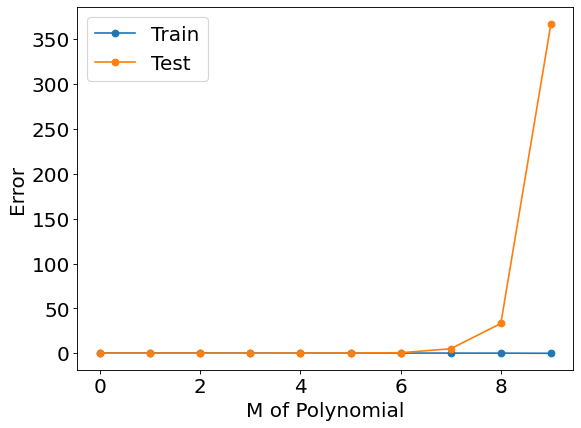

In [179]:
Font = 18
plt.figure(figsize=(8,6), dpi = 80)
plt.plot(Error_train_ls, 'o-',label = 'Train')
plt.plot(Error_test_ls,'o-', label = 'Test')
plt.legend(fontsize = Font)
plt.ylabel('Error', fontsize = Font)
plt.xlabel('M of Polynomial', fontsize = Font)
plt.xticks(fontsize = Font)
plt.yticks(fontsize = Font)

In [180]:
Error_train_ls = np.zeros([max_M,1])
Error_train_ls

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [183]:
W_norm = W/(np.sum(np.abs(W)))
W_norm

array([[-2.09386857e-06],
       [ 2.47918419e-04],
       [-3.58565012e-03],
       [ 2.33771402e-02],
       [-8.65202535e-02],
       [ 1.97492827e-01],
       [-2.84258684e-01],
       [ 2.51880602e-01],
       [-1.25630720e-01],
       [ 2.70041109e-02]])